<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Zach!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

I have the dataset from the mobile carrier Megaline and my goal is to develop a model with the highest possible accuracy that will recommend the best plan according to the customers behavior.
First, I will import any necessary libraries for the task.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

In [127]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
    
Great, the libraries are loaded    

Next, I will import the dataset and take a look at it.

In [128]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [129]:
print(df.shape)

(3214, 5)


In [130]:
display(df.head(5))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


I will check for duplicates within the dataframe.

In [131]:
duplicates = df[df.duplicated()]
duplicates

,calls,minutes,messages,mb_used,is_ultra


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

I suggest separating logically different things:

    - library imports (it's right)
    - data opening (this may not be a trivial process)
    - working code
    
This approach will improve code readability, reduce the time of searching for errors, if there are any, and exclude code re-execution

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better to use display() rather than print() to output a dataframe object. This way it will be clearer

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No checking for skips and duplicates. Please add

Now I will split the features and the target variable

In [132]:
x = df.drop('is_ultra', axis=1)
y = df['is_ultra']

I will show shape of the features and target variable.

In [133]:
print(x.shape)
print(y.shape)

(3214, 4)
(3214,)


I will split the data into training, validation, and testing sets with the "train_test_split" function. I am going to use a test size of 0.3 because I believe it will give me the highest accuracy and I will use the '54321' for the random_state

In [134]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=54321)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=54321)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No check for train/valid/test dimensions (shape).

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

A train/valid/test size fraction of 3:1:1 is good.

The model I will be using is the RandomForestClassifier with the random_state parameter '54321' so it can be reproduced. I chose this model after playing around with the LinearRegression model and only getting up to a 0.735 accuracy. This model proved to be more accurate.

In [135]:
rfc_model = RandomForestClassifier(random_state=54321)

In [136]:
lr_model = LogisticRegression(random_state=54321)

In [137]:
dtc_model = DecisionTreeClassifier(random_state=54321)

I will check the dimensions of the train, valid, and test sets.

In [138]:
print("Features (x_train):", x_train.shape)
print("Target Variable (y_train)", y_train.shape)

print("\nFeatures (x_valid):", x_valid.shape)
print("Target Variable (y_valid):", y_valid.shape)

print("\nFeatures (x_test):", x_test.shape)
print("Target Variable (y_test):", y_test.shape)

Features (x_train): (1928, 4)
Target Variable (y_train) (1928,)

Features (x_valid): (643, 4)
Target Variable (y_valid): (643,)

Features (x_test): (643, 4)
Target Variable (y_test): (643,)


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
Please present the data from which you calculated the best function

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__
We need to explore 3 models and choose the best one. But right now you don't have any research
    
<div class="alert alert-info"> <b>Student сomments:</b> Oh I see! I think I misunderstood the project! </div>

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__
    
Your sample sizes are incorrect. We need to select them with a ratio of 3:1:1. Please see the example    

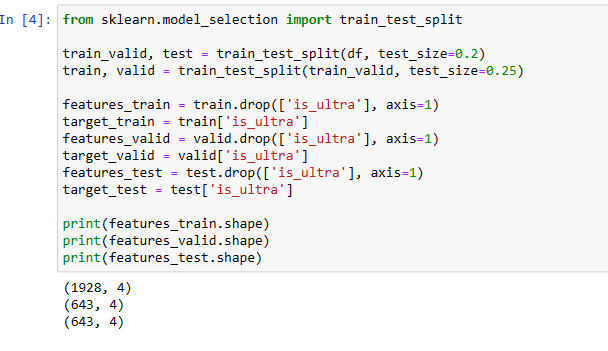

Now I will train the models with the 'fit' method using the training data and also make the predictions on the test set using 'predict' with the validation data. Then I will find the accuracy of each model with the test set.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

All right

In [139]:
rfc_model.fit(x_train, y_train)
y_prediction_rfc = rfc_model.predict(x_valid)

In [140]:
valid_accuracy_rfc = accuracy_score(y_valid, y_prediction_rfc)
print("Random Forest Classifier Validation Accuracy:", valid_accuracy_rfc)

Random Forest Classifier Validation Accuracy: 0.7822706065318819


In [141]:
lr_model.fit(x_train, y_train)
y_prediction_lr = lr_model.predict(x_valid)

In [142]:
valid_accuracy_lr = accuracy_score(y_valid, y_prediction_lr)
print("Logistic Regression Validation Accuracy:", valid_accuracy_lr)

Logistic Regression Validation Accuracy: 0.6749611197511665


In [143]:
dtc_model.fit(x_train, y_train)
y_prediction_dtc = dtc_model.predict(x_valid)

In [144]:
valid_accuracy_dtc = accuracy_score(y_valid, y_prediction_dtc)
print("Decision Tree Classifier Validation Accuracy:", valid_accuracy_dtc)

Decision Tree Classifier Validation Accuracy: 0.687402799377916


In [145]:
accuracy_rfc = accuracy_score(y_test, rfc_model.predict(x_test))
print("Random Forest Classifier Test Set Accuracy:", accuracy_rfc)

Random Forest Classifier Test Set Accuracy: 0.8102643856920684


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

On `test' we evaluate only one model, the best one according to the results of cross-validation. This concept is reflected in the conditions of model operation in the real environment: several models do not work simultaneously in industrial operation - only one model, which was selected from several during the intermediate evaluation, is put into industrial operation. It is the same here - the test sample simulates a real data stream, and only one model should work with this stream.
<div class="alert alert-info"> <b>Student сomments:</b> Is this correct? Or am I supposed to use a function to figure out the cross-validation?</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №4__

It's right

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Here's the great thing: we picked the best hyperparameters for all our models (in this case, maximizing the accuracy_score metric). Here we also identified the MOST optimal model. On validation, it turned out to be the "random forest" model.

After the hyperparameters are selected for validation, we test the models on the test data. Based on the results of testing on the test (sorry for the tautalogy), we choose a model that we can pass to production.

In conclusion, after evaluating and comparing the accuracy of each of the models validation accuracy, the model with the highest  validation accuracy appears to be Random Forest Classifier, which ends up with a 0.7976 validation set accuracy and when we test this model, it returns a 0.81 test set accuracy.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №4__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊